In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. EDB Score 

In `data/DBData.csv`, you have the full "ease of doing business" dataset from the World Bank. Reformat it into the **Tidy Data** format, so one row is per-year-per-country

Result should look like:

![](EDB_unstack.png)

In [3]:
edb = pd.read_csv('data/DBData.csv')
edb

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 20
0,Afghanistan,AFG,Dealing with construction permits (DB06-15 met...,IC.CNST.PRMT.DFRN.DB0615,NaN,NaN,24.11,24.11,24.11,24.11,...,24.11,24.11,24.11,24.49,39.38,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Dealing with construction permits (DB16-19 met...,IC.CNST.PRMT.DFRN.DB1619,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,33.70,33.70,33.70,33.70,34.54,NaN
2,Afghanistan,AFG,Dealing with construction permits: Building qu...,IC.DCP.BQC.XD.015.DB1619,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.50,2.50,2.50,2.50,3.00,NaN
3,Afghanistan,AFG,Dealing with construction permits: Building qu...,IC.CNST.PRMT.BQCI.015.DB1619.DFRN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,16.67,16.67,16.67,16.67,20.00,NaN
4,Afghanistan,AFG,Dealing with construction permits: Cost (% of ...,IC.CNST.PRMT.COST.WRH.VAL,NaN,NaN,166.50,154.10,160.10,112.50,...,85.60,80.50,71.20,66.90,59.40,61.20,66.00,71.70,73.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43455,Zimbabwe,ZWE,Trading across borders: Time to export: Border...,TRD.ACRS.BRDR.EXPT.TM.BRDR.COMP.HR.DB1619.DFRN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,45.07,45.07,45.07,45.07,45.07,NaN
43456,Zimbabwe,ZWE,Trading across borders: Time to export: Docume...,TRD.ACRS.BRDR.EXPT.TM.DOC.COMP.HR.DB1619.DFRN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,42.01,42.01,42.01,42.01,42.01,NaN
43457,Zimbabwe,ZWE,Trading across borders: Time to import (days) ...,TRD.ACRS.BRDR.IMP.TM.DY.DB0615.DFRN,NaN,NaN,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
43458,Zimbabwe,ZWE,Trading across borders: Time to import: Border...,TRD.ACRS.BRDR.IMP.TM.BRDR.COMP.HR.DB1619.DFRN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,78.97,78.97,18.76,18.76,18.76,NaN


In [4]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html

edb = pd.read_csv('data/DBData.csv')
edb = edb.drop(['Country Code','Indicator Code','Unnamed: 20'], axis=1) #Drop irrelevant cols
#Transpose pivot table and reset index
edb = edb.pivot(index='Indicator Name', columns='Country Name').T.reset_index(drop=False)
edb = edb.rename(columns={'level_0':'Year','Country Name':'Country'})
edb.columns.names = ['Measure'] #Renames first col
edb

Measure,Year,Country,Dealing with construction permits (DB06-15 methodology) - Score,Dealing with construction permits (DB16-19 methodology) - Score,Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology),Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology) - Score,Dealing with construction permits: Cost (% of Warehouse value),Dealing with construction permits: Cost (% of Warehouse value) - Score,Dealing with construction permits: Liability and insurance regimes index (0-2) (DB16-19 methodology),Dealing with construction permits: Procedures (number),...,Trading across borders: Documents to export (number) (DB06-15 methodology),Trading across borders: Documents to export (number) (DB06-15 methodology) - Score,Trading across borders: Documents to import (number) (DB06-15 methodology),Trading across borders: Documents to import (number) (DB06-15 methodology) - Score,Trading across borders: Time to export (days) (DB06-15 methodology) - Score,Trading across borders: Time to export: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to export: Documentary compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import (days) (DB06-15 methodology) - Score,Trading across borders: Time to import: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import: Documentary compliance (hours) (DB16-19 methodology) - Score
0,2004,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,2019,Vietnam,NaN,79.05,12.0,80.00,0.7,96.54,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,66.04,71.01,NaN,80.29,68.62
3388,2019,West Bank and Gaza,NaN,56.15,12.0,80.00,14.4,28.24,0.0,20.0,...,NaN,NaN,NaN,NaN,NaN,96.86,57.99,NaN,98.21,81.45
3389,2019,"Yemen, Rep.",NaN,0.00,NaN,0.00,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,0.00
3390,2019,Zambia,NaN,71.65,10.0,66.67,2.6,86.92,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,25.16,43.79,NaN,57.35,70.29


# 2 GDP and ease of doing business

Using the additional data in `data/GDPpc.csv`, join the clean dataset in **1** to the GDP data.

**What are the 3 Ease of Doing Business variables most closely linked to GDP?**

Answer by giving their correlation ratio, and give a possible explanation and a data visualization

**hint:** trying to do `df.corr()` or `sns.pairplot()` on the whole dataset will crash most computers. Be smart about the number of columns you're testing at once.

In [5]:
df = pd.read_csv('data/GDPpc.csv')
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24630.939270,23512.602600,24984.279450,24709.602260,25018.308950,25528.403780,25796.380250,25251.639680,25655.102020,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,...,444.184404,550.514974,599.297630,648.511070,647.966461,625.339539,590.076474,549.582760,550.068459,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3117.896944,3585.905553,4615.867475,5102.489969,5258.407376,5412.692348,4170.730358,3509.604211,4100.289786,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4114.134899,4094.360204,4437.177794,4247.614342,4413.082887,4578.667934,3952.830781,4131.872341,4537.579056,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,43339.379870,39736.354060,41098.766940,38391.080870,40619.711300,42294.994730,36038.267600,37231.815670,39146.548840,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3209.694109,3283.510304,3736.363217,3600.673475,3876.958302,4054.721339,3574.543333,3697.121677,3957.441819,NaN
260,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1093.812918,1309.231960,1349.420250,1421.171575,1580.181601,1647.033657,1693.907815,1320.924127,1106.803906,NaN
261,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,433.941194,444.896268,461.798232,498.601747,534.374176,568.348265,...,5805.998362,7276.376756,7967.678159,7478.136578,6819.062302,6429.023950,5742.987800,5279.730472,6151.077955,NaN
262,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,234.166194,221.728401,213.894229,214.852954,243.105321,303.882532,...,1139.110233,1463.213573,1644.619672,1734.930612,1850.793359,1738.088202,1313.889646,1262.989682,1513.276316,NaN


In [6]:
gdp = pd.read_csv('data/GDPpc.csv')
gdp = gdp.drop(['Country Code','Indicator Code'],axis=1)

gdp = gdp.pivot(index='Indicator Name', columns='Country Name').T

gdp = gdp.reset_index()

gdp = gdp.rename(columns={'level_0':'Year','Country Name': 'Country'})


gdp.dropna()

Indicator Name,Year,Country,GDP per capita (current US$)
0,1960,Afghanistan,59.777327
2,1960,Algeria,244.824806
11,1960,Australia,1807.349784
12,1960,Austria,935.460427
14,1960,"Bahamas, The",1550.324315
...,...,...,...
15307,2017,West Bank and Gaza,3094.725747
15308,2017,World,10721.608850
15309,2017,"Yemen, Rep.",1106.803906
15310,2017,Zambia,1513.276316


In [10]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corrwith.html
#https://www.geeksforgeeks.org/python-pandas-dataframe-corrwith/
# ***DF.CORRWITH()****

edb_gdp = edb.merge(gdp, how='inner', on=['Year','Country'])
#dff = dff.dropna()

edb_gdp.Year = edb_gdp.Year.astype(int) #Convert year to int

#edb_gdp.sort_values(by='GDP per capita (current US$)',ascending=False)

#looks at corr with different col values and loooks at relation to GDP per capita
corr_df = pd.DataFrame(edb_gdp.corrwith(edb_gdp['GDP per capita (current US$)']))
corr_df = corr_df.rename(columns={0:'Correlation'}) #Rename col title for fun
corr_df.dropna(inplace=True) #Drop NaN values


#corr_df['Correlation'] = corr_df['Correlation'].abs() 
#If we wanted to see negative correlation as well, we could get abs value and order it
#Might need to create an absolute value col

#Create absolut value col to get negative correlations as well. 
corr_df['Abs Corr'] = corr_df['Correlation'].abs() 

corr_df = corr_df.sort_values('Abs Corr',ascending=False) #Sort values by largest

corr_df = corr_df.drop(corr_df.index[0]) #Drop GDP row (first row)

corr_df.head(3)

,Correlation,Abs Corr
Getting electricity: Total duration and frequency of outages per customer a year (0-3) (DB16-19 methodology),0.646972,0.646972
Resolving insolvency (DB04-14 methodology) - Score,0.644669,0.644669
Resolving insolvency: Recovery rate (cents on the dollar),0.644232,0.644232


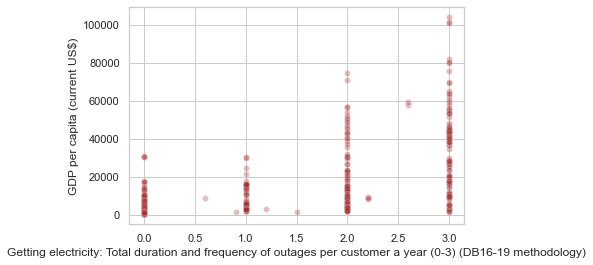

In [11]:
sns.set(style='whitegrid')

sns.scatterplot(
    data=edb_gdp,
    y='GDP per capita (current US$)',
    x='Getting electricity: Total duration and frequency of outages per customer a year (0-3) (DB16-19 methodology)',
    color='brown',alpha=.3
);

#This plot shows us that countries with higher GDP per capita tend to be score above a score of 2. 
# However as we can see, many countries with lower GDP still score pretty well in Getting Electricity score

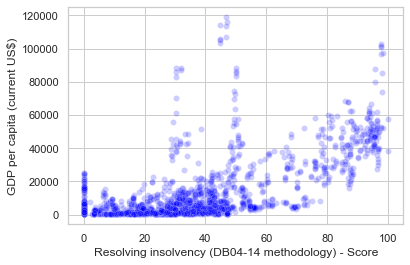

In [12]:
sns.scatterplot(data=edb_gdp,x='Resolving insolvency (DB04-14 methodology) - Score',
               y='GDP per capita (current US$)',color='blue',alpha=.2);

#We can see the correlation where higher scores in Reolving Insovency we will see a higher GDP per capita
# However, there are several outliers in the plot. Same as below. 

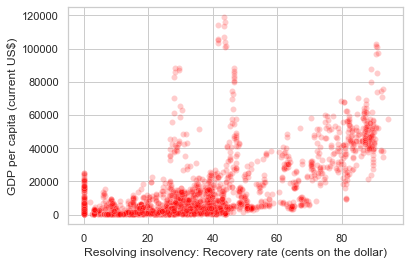

In [13]:
sns.scatterplot(data=edb_gdp, x='Resolving insolvency: Recovery rate (cents on the dollar)',
                y='GDP per capita (current US$)',color='red',alpha=.2);

#We can see the correlation where higher scores in Resolving Insolvency: Recovery rate tend to have higher
# GDP per capita. However we can see that there are quite a few outliers. 

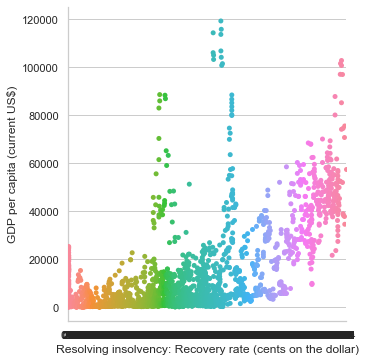

In [14]:
sns.catplot(data=edb_gdp, x='Resolving insolvency: Recovery rate (cents on the dollar)',
                y='GDP per capita (current US$)');


# 3. Chocolate Nobel question

In this repository is the academic paper `chocolate_nobel.pdf`. 

Explain in 3 paragraphs why this paper's conclusions are bad statistics.

The author looks at the relation between chocolate consumptions and cognitive function. The paper does look at the relationship, however, in a very limited scope. The author looks at chocolate consumption per capita for a 1 year period and attempts to make a link between that and the number of Nobel Laureates per 10 million population. Although the author discovers a somewhat positive correlation, the author fails to consider other factor that might impact the number of Nobel Laureates that any given country might have. Factors such as ease of accesss to education, impact on wealth and even fails to concretely mention the type of chocolate the research is focusing (does the plot focus on dark chocolate? Which percentage of cocoa? etc.). 

The overall approach that the author takes leaves a lot of room for ambiguity. The author doesn't include data on countries that might also consume high amounts of chocolate but maybe not produce as many Nobel Laureates. The only outlier country that the author looks at is Sweden due to its higher-than-average Nobel Laureates but lower chocolate consumption in comparison to other countries the author looks at. 

Another important fault in this research are the timelines that the author chose to look at. When it comes to the chocolate consumption data, the author looks at several different time periods for different countries which is quite a significant mothodological error. Especially when the data for China begins in 2002 and the data for switzerland begins in 2011. If the author did look at all the same year, and since this paper was published in 2012, the author could have really only looked at 2011 for all countries to maintain the same timeline. Furthermore, the data for Nobel Laureates is up until October 10,2011, which leaves very little room for the research to look at patterns of correlation. The author would need more than one year of data to really get a look at the correlation between chocolate consumption and Nobel Laureates by country. Lastly, another very important thing to look at in this paper, is the fact the the author begins by looking at favonoids, rather than just looking at chocolate, the author would have probably gotten a better understanding of the relationship between cognitive function and flavinoids if they had looked at other foods (ie wine, green tea, etc.). 

Overall this research could be good as a research proposal but as actual academic research, the findings are lacking any substantial-academic foundation. The research lacks specificity and uniformity. Also the research lacks relfection. The author does not reflect on errors in their research and in certain factors that might impact the outcome of the data or research. 